# Tsallis network models

## Tsallis-Erdös-Rényi model

In [164]:
%load_ext autoreload
%autoreload 2

In [115]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tqdm import tqdm

from src.ensemble_generators import generate_tsallis_ensemble

### The free energy density

In [9]:
def H(x):
    # The binary Shannon entropy
    return -x*np.log(x) - (1-x)*np.log(1-x)

def phi(x, theta, r):
    # The free entropy density
    return (H(x) - 1/r*np.log(1 + r*x*theta))

#### Figure 4.1 - Plot the free entropy density for three different values of theta

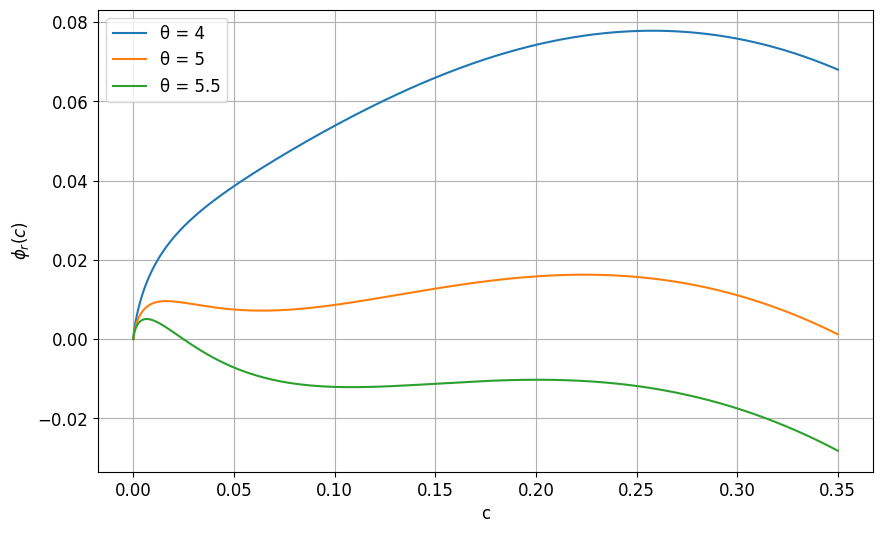

In [11]:
# Plot the free entropy density for three different values of theta
x = np.linspace(1e-6, 0.35, 1000)
r = 2.7
thetas = [4, 5, 5.5]

plt.figure(figsize=(10,6))

for theta in thetas:
    y = phi(x, theta, r)
    plt.plot(x, y, label=f'θ = {theta}')

plt.rcParams.update({'font.size': 12})

plt.xlabel('x')
plt.xlabel('c')
plt.ylabel(r'$\phi_r(c)$')
# plt.title(f'Potential $\phi_r(c)$ for r = {r} and different $\\theta$')
plt.legend()
plt.grid(True)



### Saddle point equation

#### Figure 4.3 - comparison of the left-hand side and right-hand side of the saddle-point equation

In [ ]:
# RHS of the saddle point equation
def rhs_saddle(c, theta, r):
    return 1/(1+np.exp(1/(1/theta + r*c)))

(0.0, 0.8)

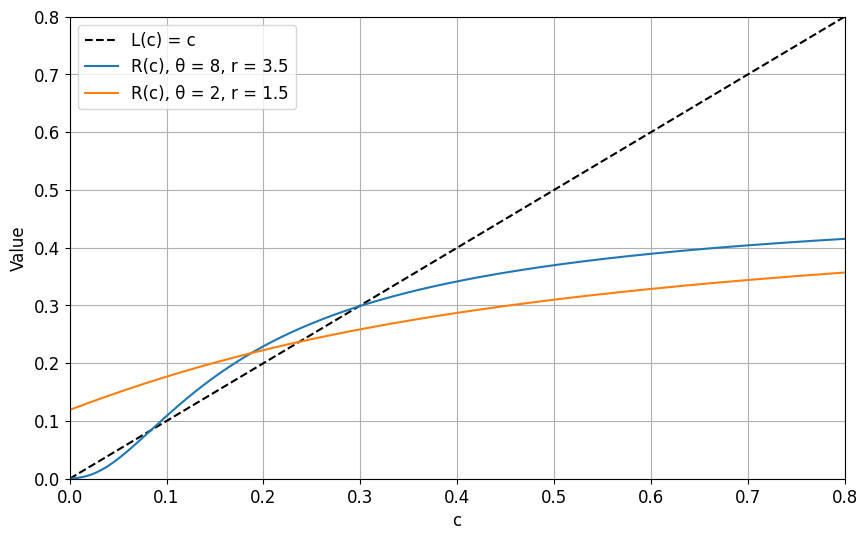

In [8]:
# Plot the RHS of the saddle point equation
c_array = np.linspace(0, 0.8, 1000)
rhs_values_1 = rhs_saddle(c_array, 8, 3.5)
rhs_values_2 = rhs_saddle(c_array, 2, 1.5)

plt.figure(figsize=(10, 6))

# Plot L(c) = c (the identity function)
plt.plot(c_array, c_array, 'k--', label='L(c) = c')

# Plot R(c) for the two parameter sets
plt.plot(c_array, rhs_values_1, label=f'R(c), θ = 8, r = 3.5')
plt.plot(c_array, rhs_values_2, label=f'R(c), θ = 2, r = 1.5')

plt.rcParams.update({'font.size': 12})
plt.xlabel('c')
plt.ylabel('Value')
# plt.title('Saddle Point Equation: L(c) vs R(c)')
plt.legend()
plt.grid(True)
plt.xlim(0, 0.8)
plt.ylim(0, 0.8)


### Phase transition

In [ ]:
from src.saddle_point_equation_solvers import find_stable_fixed_points

In [85]:
def saddle_point_equation(x, theta, r):
    return x - 1/(1+np.exp(1/(1/theta + r*x)))


#### Figure 4.2 - the link density for r=2 and r=2.7. For r=2.7, we observe the phase transition

r=2.7

In [119]:
_, global_maxima_1, local_maxima_arr_1, thetas_1 = find_stable_fixed_points(r=2.7, max_theta=8, saddle_point_equation=saddle_point_equation, phi=phi, lower_bound=0, upper_bound=1)

r=2

In [120]:
min_phi_arr_2, global_maxima_2, local_maxima_arr_2, thetas_2 = find_stable_fixed_points(r=2, max_theta=8, saddle_point_equation=saddle_point_equation, phi=phi, lower_bound=0, upper_bound=1)

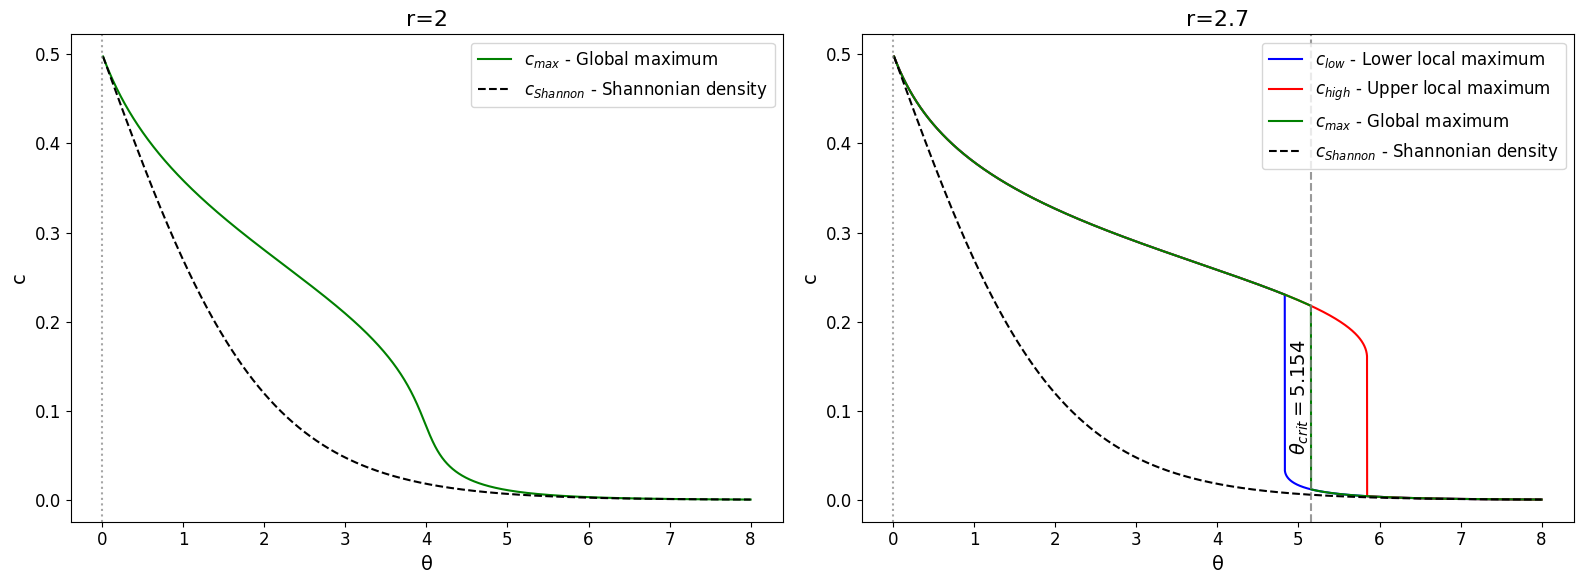

In [124]:
# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
LEGEND_SIZE = 12

# Update font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# First subplot (r=2)
plt.subplot(1, 2, 1)
plt.plot(thetas_2, global_maxima_2, 'g-', label='$c_{max}$ - Global maximum')
# Calculate the sigmoid function values for each theta
sigmoid_values_2 = 1/(1+np.exp(thetas_2))
# Add the sigmoid plot
plt.plot(thetas_2, sigmoid_values_2, 'k--', label='$c_{Shannon}$ - Shannonian density')
# Add a vertical line at theta = 0 for reference
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.7)
plt.xlabel('θ')
plt.ylabel('c')
plt.title('r=2')
plt.legend()

# Second subplot (r=2.7)
plt.subplot(1, 2, 2)
plt.plot(thetas_1, local_maxima_arr_1[:,0], 'b-', label='$c_{low}$ - Lower local maximum')
plt.plot(thetas_1, local_maxima_arr_1[:,1], 'r-', label='$c_{high}$ - Upper local maximum')
plt.plot(thetas_1, global_maxima_1, 'g-', label='$c_{max}$ - Global maximum')
# Calculate the sigmoid function values for each theta
sigmoid_values = 1/(1+np.exp(thetas_1))
# Add the sigmoid plot
plt.plot(thetas_1, sigmoid_values, 'k--', label='$c_{Shannon}$ - Shannonian density')
# Add a vertical line at theta = 0 for reference
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.7)
# Add a vertical line at the critical theta value
plt.axvline(x=5.154, color='gray', linestyle='--', alpha=0.8)
# Add text annotation for the critical theta
plt.text(5.154, 0.05, r'$\theta_{crit} = 5.154$', rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=MEDIUM_SIZE)
plt.xlabel('θ')
plt.ylabel('c')
plt.title('r=2.7')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Figure 4.4 - The phase diagram

In [52]:
from src.saddle_point_equation_solvers import find_critical_thetas

In [93]:
r_values = np.linspace(2, 8, 400)
max_theta = 30
transition_thetas_networks= np.zeros((len(r_values),3))
global_maxima_all = []
local_maxima_arr_all = []
for i, r in enumerate(tqdm(r_values)):
    _, global_maxima, local_maxima_arr, thetas = find_stable_fixed_points(r, max_theta=max_theta, saddle_point_equation=saddle_point_equation, phi=phi, lower_bound=0, upper_bound=1)
    global_maxima_all.append(global_maxima)
    local_maxima_arr_all.append(local_maxima_arr)
    transition_thetas_networks[i] = find_critical_thetas(local_maxima_arr, global_maxima, thetas)

  0%|          | 0/400 [00:00<?, ?it/s]/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_4033/3413313408.py:3: RuntimeWarning: divide by zero encountered in log
  return -x*np.log(x) - (1-x)*np.log(1-x)
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_4033/3413313408.py:3: RuntimeWarning: invalid value encountered in multiply
  return -x*np.log(x) - (1-x)*np.log(1-x)
100%|██████████| 400/400 [41:45<00:00,  6.26s/it]


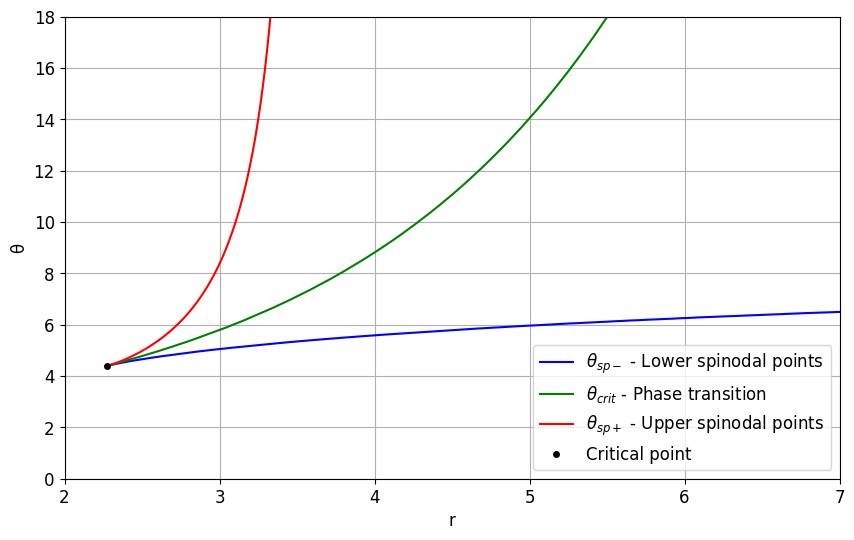

In [114]:
plt.figure(figsize=(10,6))
plt.plot(r_values, transition_thetas_networks[:,0], 'b-', label=r'$\theta_{sp-}$ - Lower spinodal points')
plt.plot(r_values, transition_thetas_networks[:,1], 'g-', label=r'$\theta_{crit}$ - Phase transition') 
plt.plot(r_values, transition_thetas_networks[:,2], 'r-', label=r'$\theta_{sp+}$ - Upper spinodal points')
r_crit = 2.27671753
theta_crit = 4.39935728
plt.plot(r_crit, theta_crit, 'ko', markersize=4, label='Critical point')
plt.grid(True)
plt.xlabel('r')
plt.ylabel('θ')
plt.ylim(0, 18)
plt.xlim(2, 7)
# plt.title('Critical θ values vs r')
# Set the legend to appear at the bottom right
plt.legend(loc='lower right')
plt.show()

#### Figure 4.5 - the irreconstructible link densities

In [ ]:
from src.saddle_point_equation_solvers import find_spinodal_indices

In [ ]:
def compute_irreconstructible_densities(local_maxima_arr_all):
    c_low_after_jump_all = np.zeros(len(local_maxima_arr_all))
    c_high_before_jump_all = np.zeros(len(local_maxima_arr_all))
    for i in range(len(local_maxima_arr_all)):
        local_maxima_arr = local_maxima_arr_all[i]
        c_low_jump_index, c_high_jump_index = find_spinodal_indices(local_maxima_arr)
        c_low_after_jump_all[i] = local_maxima_arr[c_low_jump_index + 1, 0] if c_low_jump_index is not None else np.nan
        c_high_before_jump_all[i] = local_maxima_arr[c_high_jump_index, 1] if (c_high_jump_index is not None and c_high_jump_index != 9999) else np.nan
    return c_low_after_jump_all, c_high_before_jump_all

In [ ]:
c_low_after_jump_all, c_high_before_jump_all = compute_irreconstructible_densities(local_maxima_arr_all)

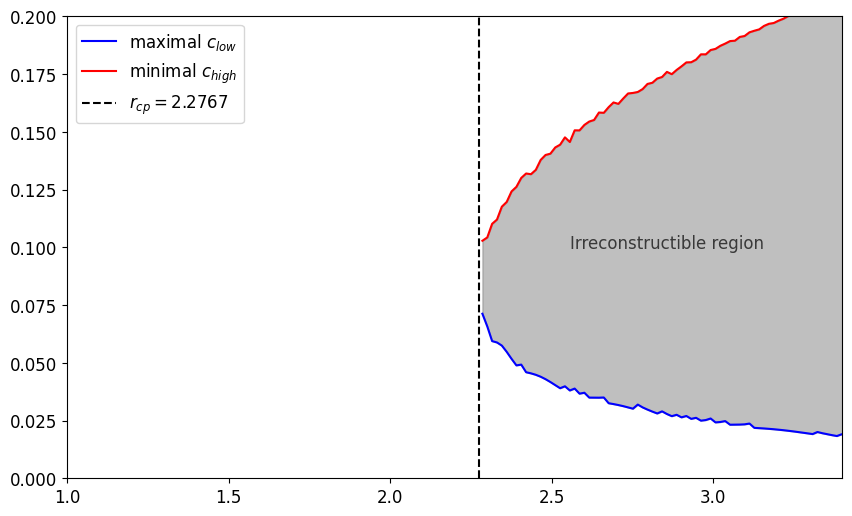

In [117]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# your two curves
plt.plot(r_values, c_low_after_jump_all, 'b-', label=r'maximal $c_{low}$')
plt.plot(r_values, c_high_before_jump_all, 'r-', label=r'minimal $c_{high}$')

# vertical line
plt.axvline(x=2.2767, color='k', linestyle='--', label=r'$r_{cp}=2.2767$')

# fill between
mask = c_high_before_jump_all > c_low_after_jump_all
plt.fill_between(
    r_values,
    c_low_after_jump_all,
    c_high_before_jump_all,
    where=mask,
    color='grey',
    alpha=0.5,
)

# compute a good spot for the label
# pick the subsection of r where we’ve shaded
r_shaded = r_values[mask]
low_shaded = c_low_after_jump_all[mask]
high_shaded = c_high_before_jump_all[mask]

# take the midpoint of that range
x_text = (r_shaded.min() + r_shaded.max()) / 2
# and halfway between the two curves there (interpolating if needed)
# find the index closest to x_text
idx = np.argmin(np.abs(r_values - x_text))
y_text = (c_low_after_jump_all[idx] + c_high_before_jump_all[idx]) / 2

plt.text(
    x_text, y_text, 'Irreconstructible region',
    color='black',        # more contrast against grey
    fontsize=12,
    ha='center', va='center',
    # backgroundcolor='white',  # optional to improve legibility
    alpha=0.7
)

plt.legend()
plt.xlim(1, 3.4)
plt.ylim(0, 0.2)
plt.show()

### Network properties

Generate ensembles

In [116]:
num_nodes = 100
num_samples = 1000
initial_num_edges = 10
q_values = np.ones(10) - np.linspace(1e-6, 1e-3, 10)
thetas = [1, 3, 5]

In [ ]:
if not os.path.exists('data/ensembles_q_to_1_linear.pkl'):
    ensembles = {}
    for theta in thetas:
        ensembles[theta] = {}
        for q in q_values:
            print(f"Generating ensemble for theta={theta}, q={q}")
            ensemble = generate_tsallis_ensemble(q, [theta], num_nodes, num_samples, initial_num_edges, skip_first_samples=20)
            ensembles[theta][q] = ensemble

    # Create data directory if it doesn't exist
    os.makedirs('data', exist_ok=True)

    # Save ensembles to pickle file
    with open('data/ensembles_q_to_1_linear.pkl', 'wb') as f:
        pickle.dump(ensembles, f)
else:
    with open('data/ensembles_q_to_1_linear.pkl', 'rb') as f:
        ensembles = pickle.load(f)

#### Figure 4.6 - Compare the ensemble average link density with theoretical values

Ensemble averages

In [ ]:
# Function to compute average number of links
def compute_avg_num_links(ensemble):
    return np.mean([graph.ecount() for graph in ensemble])

In [ ]:
# Compute average number of links for each ensemble
avg_num_links = {theta: {} for theta in ensembles.keys()}
for theta in ensembles.keys():
    for q in ensembles[theta]:
        avg_num_links[theta][q] = compute_avg_num_links(ensembles[theta][q])

Linear correction from perturbative approach

In [ ]:
correction_coefficients = np.array([1/2 * theta ** 2 / (1 + np.exp(theta))**2 * np.exp(theta) * (2*num_nodes ** 2 - 1 + np.exp(theta)) for theta in thetas])
linear_corrections_c = 1/(1 + np.exp(thetas).reshape(-1, 1)) * (1 + correction_coefficients.reshape(-1, 1) * (1 - np.array(q_values)))


Solutions of the saddle-point equations

In [ ]:
def saddle_point_equation_q(c, theta, N, q):
    return np.log((1-c)/c) - theta/(1 + (1-q)*theta*N*c)

def find_c(theta, N, q):
    """
    Find c that solves saddle_point_equation_q = 0 for given theta, q and N
    """
    # Define function to find root of
    def func(c):
        return saddle_point_equation_q(c, theta, N, q)
    
    # Find root using scipy optimize
    result = optimize.root_scalar(func, bracket=[1e-10, 1-1e-10], method='brentq')
    
    if result.converged:
        return result.root
    else:
        raise RuntimeError("Root finding did not converge")

In [ ]:
# Get theoretical prediction for number of links
N = num_nodes ** 2
theoretical_c = {}
q_values_theor = np.linspace(1-1e-6, 1-1e-3, 100)
for theta in thetas:
    theoretical_c[theta] = {}
    for q in q_values_theor:
        c = find_c(theta, N, q)
        theoretical_c[theta][q] = c

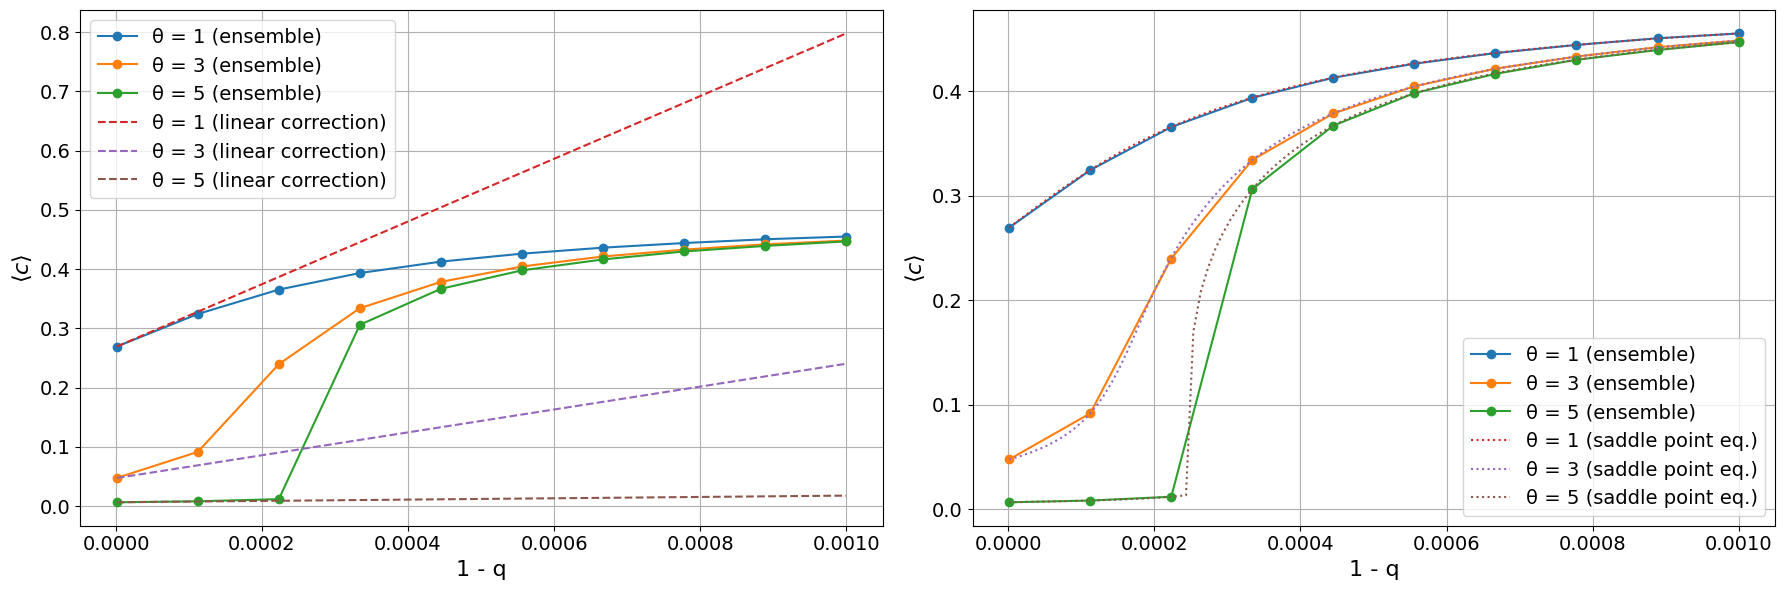

In [ ]:
# Set font sizes
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
title_fontsize = 18

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Left plot: Linear corrections ---
for theta in avg_num_links:
    q_values_plot = sorted(avg_num_links[theta].keys())
    avg_links = [avg_num_links[theta][q] for q in q_values_plot]
    densities = [avg_num_links[theta][q] / num_nodes**2 for q in q_values_plot]
    axes[0].plot(1 - np.array(q_values_plot), densities, marker='o', label=f'θ = {theta} (ensemble)')

for i, theta in enumerate(thetas):
    axes[0].plot(1 - np.array(q_values), linear_corrections_c[i], '--', label=f'θ = {theta} (linear correction)')

axes[0].set_xlabel('1 - q', fontsize=label_fontsize)
axes[0].set_ylabel(r'$\langle c \rangle$', fontsize=label_fontsize)
# axes[0].set_title('Average number of links vs q\n(Linear corrections)', fontsize=title_fontsize)
axes[0].legend(fontsize=legend_fontsize)
axes[0].grid(True)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)

# --- Right plot: Theoretical predictions ---
for theta in avg_num_links:
    avg_links = [avg_num_links[theta][q] for q in q_values]
    densities = [avg_num_links[theta][q] / num_nodes**2 for q in q_values]
    axes[1].plot(1 - np.array(q_values), densities, marker='o', label=f'θ = {theta} (ensemble)')

for theta in theoretical_c:
    c_values = [theoretical_c[theta][q] for q in q_values_theor]
    axes[1].plot(1 - np.array(q_values_theor), c_values, ':', label=f'θ = {theta} (saddle point eq.)')

axes[1].set_xlabel('1 - q', fontsize=label_fontsize)
axes[1].set_ylabel(r'$\langle c \rangle$', fontsize=label_fontsize)
# axes[1].set_title('Average number of links vs q\n(Theoretical predictions)', fontsize=title_fontsize)
axes[1].legend(fontsize=legend_fontsize)
axes[1].grid(True)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()

#### Figure 4.7 - comparison of distributions of link densities close to and far from phase transition

In [129]:
r = 2.7
theta = 5.154

num_nodes = 100
# r=(1-q)*N
q = 1 - r/num_nodes**2
num_samples = 10000

Near phase transition - two initial conditions leading to two different stable points

In [130]:
initial_num_edges_low_c = 100
initial_num_edges_high_c = 3000

In [131]:
if os.path.exists('data/density_distributions/ensemble_low_c.pkl'):
    with open('data/density_distributions/ensemble_low_c.pkl', 'rb') as f:
        ensemble_low_c = pickle.load(f)
else:
    ensemble_low_c = generate_tsallis_ensemble(q, [theta], num_nodes, num_samples, initial_num_edges_low_c, skip_first_samples=100)
    with open('data/density_distributions/ensemble_low_c.pkl', 'wb') as f:
        pickle.dump(ensemble_low_c, f)

if os.path.exists('data/density_distributions/ensemble_high_c.pkl'):
    with open('data/density_distributions/ensemble_high_c.pkl', 'rb') as f:
        ensemble_high_c = pickle.load(f)
else:
    ensemble_high_c = generate_tsallis_ensemble(q, [theta], num_nodes, num_samples, initial_num_edges_high_c, skip_first_samples=100)
    with open('data/density_distributions/ensemble_high_c.pkl', 'wb') as f:
        pickle.dump(ensemble_high_c, f)


In [133]:
avg_density_low_c = np.mean([graph.ecount() for graph in ensemble_low_c])/num_nodes**2
avg_density_high_c = np.mean([graph.ecount() for graph in ensemble_high_c])/num_nodes**2
print("Low density phase c:", avg_density_low_c)
print("High density phase c:", avg_density_high_c)


Low density phase c: 0.012005440000000001
High density phase c: 0.21731155


Far from phase transition

In [128]:
r = 1000
theta = 1

num_nodes = 100
# r=(1-q)*N
q = 1 - r/num_nodes**2
num_samples = 10000
initial_num_edges_high_c = 1000
if os.path.exists('data/density_distributions/ensemble_tsallis_r_high.pkl'):
    with open('data/density_distributions/ensemble_tsallis_r_high.pkl', 'rb') as f:
        ensemble_tsallis_r_high = pickle.load(f)
else:
    ensemble_tsallis_r_high = generate_tsallis_ensemble(q, [theta], num_nodes, num_samples, initial_num_edges_high_c, skip_first_samples=100)
    with open('data/density_distributions/ensemble_tsallis_r_high.pkl', 'wb') as f:
        pickle.dump(ensemble_tsallis_r_high, f)


In [134]:
avg_density_r_high = np.mean([graph.ecount() for graph in ensemble_tsallis_r_high])/num_nodes**2
print("Far from phase transition c:", avg_density_r_high)

Far from phase transition c: 0.49948702999999994


Corresponding Erdos-Renyi ensembles

In [137]:
def compute_er_theta(target_density):
    """
    Compute the theta parameter for an Erdos-Renyi model given a target density.
    
    In the Erdos-Renyi model, the probability of an edge is:
    p = 1/(1+exp(theta))
    
    This function inverts this relationship to find theta given p.
    
    Args:
        target_density (float): The desired edge density (between 0 and 1)
        
    Returns:
        float: The theta parameter that will produce the target density
    """
    # Ensure the target density is valid
    if target_density <= 0 or target_density >= 1:
        raise ValueError("Target density must be between 0 and 1")
    
    theta = np.log((1 - target_density) / target_density)
    
    return theta

In [138]:
# Compute corresponding Erdos-Renyi parameters theta
er_theta_low_c = compute_er_theta(avg_density_low_c)
er_theta_high_c = compute_er_theta(avg_density_high_c)
er_theta_r_high = compute_er_theta(avg_density_r_high)

In [145]:
from src.shannonian_models import erdos_renyi_ensemble_igraph
ensemble_low_c_er = erdos_renyi_ensemble_igraph(er_theta_low_c, num_nodes, num_samples)
ensemble_high_c_er = erdos_renyi_ensemble_igraph(er_theta_high_c, num_nodes, num_samples)
ensemble_r_high_er = erdos_renyi_ensemble_igraph(er_theta_r_high, num_nodes, num_samples)

In [146]:
# Compute average number of links for each ensemble
avg_num_links_low_c_er = np.mean([graph.ecount() for graph in ensemble_low_c_er])/num_nodes**2
avg_num_links_high_c_er = np.mean([graph.ecount() for graph in ensemble_high_c_er])/num_nodes**2
avg_num_links_r_high_er = np.mean([graph.ecount() for graph in ensemble_r_high_er])/num_nodes**2
print("Low density phase c (ER):", avg_num_links_low_c_er)
print("High density phase c (ER):", avg_num_links_high_c_er)
print("Far from phase transition c (ER):", avg_num_links_r_high_er)


Low density phase c (ER): 0.01200201
High density phase c (ER): 0.21733381
Far from phase transition c (ER): 0.49957918


Compute the histograms

In [147]:
densities_low_c_tsallis = [g.ecount() / num_nodes**2 for g in ensemble_low_c]
densities_high_c_tsallis = [g.ecount() / num_nodes**2 for g in ensemble_high_c]
densities_r_high_tsallis = [g.ecount() / num_nodes**2 for g in ensemble_tsallis_r_high]
densities_low_c_er = [g.ecount() / num_nodes**2 for g in ensemble_low_c_er]
densities_high_c_er = [g.ecount() / num_nodes**2 for g in ensemble_high_c_er]
densities_r_high_er = [g.ecount() / num_nodes**2 for g in ensemble_r_high_er]

# Get shared bins for fair comparison
all_low_c_densities = np.array(densities_low_c_tsallis + densities_low_c_er)
low_c_bins = np.histogram_bin_edges(all_low_c_densities, bins=30)

all_high_c_densities = np.array(densities_high_c_tsallis + densities_high_c_er)
high_c_bins = np.histogram_bin_edges(all_high_c_densities, bins=30)

all_r_high_densities = np.array(densities_r_high_tsallis + densities_r_high_er)
r_high_bins = np.histogram_bin_edges(all_r_high_densities, bins=30)

# Compute histograms
hist_low_c_tsallis, bin_edges_low_c_tsallis = np.histogram(densities_low_c_tsallis, bins=low_c_bins, density=True)
hist_high_c_tsallis, bin_edges_high_c_tsallis = np.histogram(densities_high_c_tsallis, bins=high_c_bins, density=True)

In [148]:
low_c_tsallis_hist, low_c_bin_edges = np.histogram(densities_low_c_tsallis, bins=low_c_bins, density=True)
low_c_er_hist, _ = np.histogram(densities_low_c_er, bins=low_c_bins, density=True)
low_c_bin_centers = 0.5 * (low_c_bin_edges[:-1] + low_c_bin_edges[1:])

high_c_tsallis_hist, high_c_bin_edges = np.histogram(densities_high_c_tsallis, bins=high_c_bins, density=True)
high_c_er_hist, _ = np.histogram(densities_high_c_er, bins=high_c_bins, density=True)
high_c_bin_centers = 0.5 * (high_c_bin_edges[:-1] + high_c_bin_edges[1:])

r_high_tsallis_hist, r_high_bin_edges = np.histogram(densities_r_high_tsallis, bins=r_high_bins, density=True)
r_high_er_hist, _ = np.histogram(densities_r_high_er, bins=r_high_bins, density=True)
r_high_bin_centers = 0.5 * (r_high_bin_edges[:-1] + r_high_bin_edges[1:])


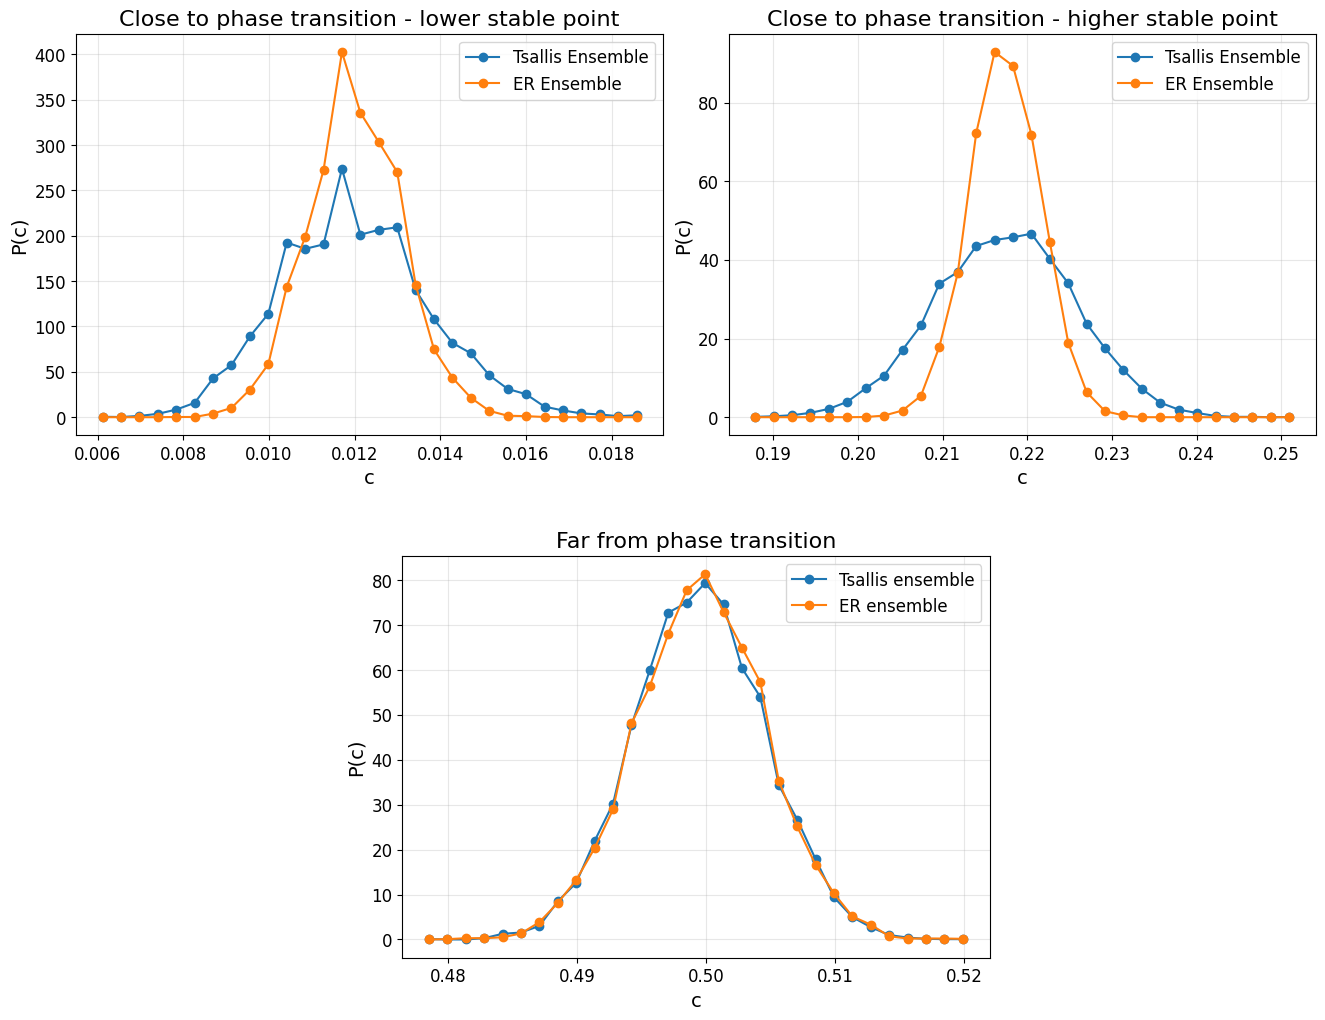

In [149]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 12))

gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1])

# First row: close to phase transition
# First graph takes columns 0-1
ax1 = fig.add_subplot(gs[0, 0:2])
# Second graph takes columns 2-3
ax2 = fig.add_subplot(gs[0, 2:4])

ax1.plot(low_c_bin_centers, low_c_tsallis_hist, '-o', label='Tsallis Ensemble')
ax1.plot(low_c_bin_centers, low_c_er_hist, '-o', label='ER Ensemble')
ax1.set_title('Close to phase transition - lower stable point')
ax1.set_xlabel('c')
ax1.set_ylabel('P(c)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(high_c_bin_centers, high_c_tsallis_hist, '-o', label='Tsallis Ensemble')
ax2.plot(high_c_bin_centers, high_c_er_hist, '-o', label='ER Ensemble')
ax2.set_title('Close to phase transition - higher stable point')
ax2.set_xlabel('c')
ax2.set_ylabel('P(c)')
ax2.legend()
ax2.grid(alpha=0.3)

# Second row: far from phase transition (centered)
# Bottom graph takes columns 1-2 (middle two columns)
ax3 = fig.add_subplot(gs[1, 1:3])
ax3.plot(r_high_bin_centers, r_high_tsallis_hist, 'o-', label='Tsallis ensemble')
ax3.plot(r_high_bin_centers, r_high_er_hist, 'o-', label='ER ensemble')
ax3.set_xlabel('c')
ax3.set_ylabel('P(c)')
ax3.set_title('Far from phase transition')
ax3.legend()
ax3.grid(alpha=0.3)

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.25)

plt.show()

Standard deviations comparison

In [150]:
print("Low c comparison:")
print(f"Tsallis mean density: {np.mean(densities_low_c_tsallis):.4f}, std: {np.std(densities_low_c_tsallis):.4f}")
print(f"ER mean density: {np.mean(densities_low_c_er):.4f}, std: {np.std(densities_low_c_er):.4f}")
print("\nHigh c comparison:")
print(f"Tsallis mean density: {np.mean(densities_high_c_tsallis):.4f}, std: {np.std(densities_high_c_tsallis):.4f}")
print(f"ER mean density: {np.mean(densities_high_c_er):.4f}, std: {np.std(densities_high_c_er):.4f}")

Low c comparison:
Tsallis mean density: 0.0120, std: 0.0018
ER mean density: 0.0120, std: 0.0011

High c comparison:
Tsallis mean density: 0.2173, std: 0.0082
ER mean density: 0.2173, std: 0.0041


#### Figure 4.8 - ANND and clustering

In [192]:
from src.network_properties import clustering_coeff, annd, average_property_over_degree

In [201]:
def compute_annd_per_degree(ensemble, mode="out"):
    degrees = [graph.degree(mode=mode) for graph in tqdm(ensemble)]
    max_degree = np.max(degrees)
    annd_values = [annd(graph, mode=mode) for graph in tqdm(ensemble)]
    return average_property_over_degree(degrees, annd_values, max_degree)

def compute_clustering_per_degree(ensemble):
    degrees = [graph.degree(mode="all") for graph in tqdm(ensemble)]
    max_degree = np.max(degrees)
    clustering_coeffs = [clustering_coeff(graph) for graph in tqdm(ensemble)]
    return average_property_over_degree(degrees, clustering_coeffs, max_degree)


In [209]:
annd_tsallis_high_c_per_degree = compute_annd_per_degree(ensemble_high_c)
annd_er_high_c_per_degree = compute_annd_per_degree(ensemble_high_c_er)
annd_tsallis_r_high_per_degree = compute_annd_per_degree(ensemble_tsallis_r_high)
annd_er_r_high_per_degree = compute_annd_per_degree(ensemble_r_high_er)
clustering_tsallis_high_c_per_degree = compute_clustering_per_degree(ensemble_high_c)
clustering_er_high_c_per_degree = compute_clustering_per_degree(ensemble_high_c_er)
clustering_tsallis_r_high_per_degree = compute_clustering_per_degree(ensemble_tsallis_r_high)
clustering_er_r_high_per_degree = compute_clustering_per_degree(ensemble_r_high_er)


100%|██████████| 10000/10000 [00:06<00:00, 1435.10it/s]


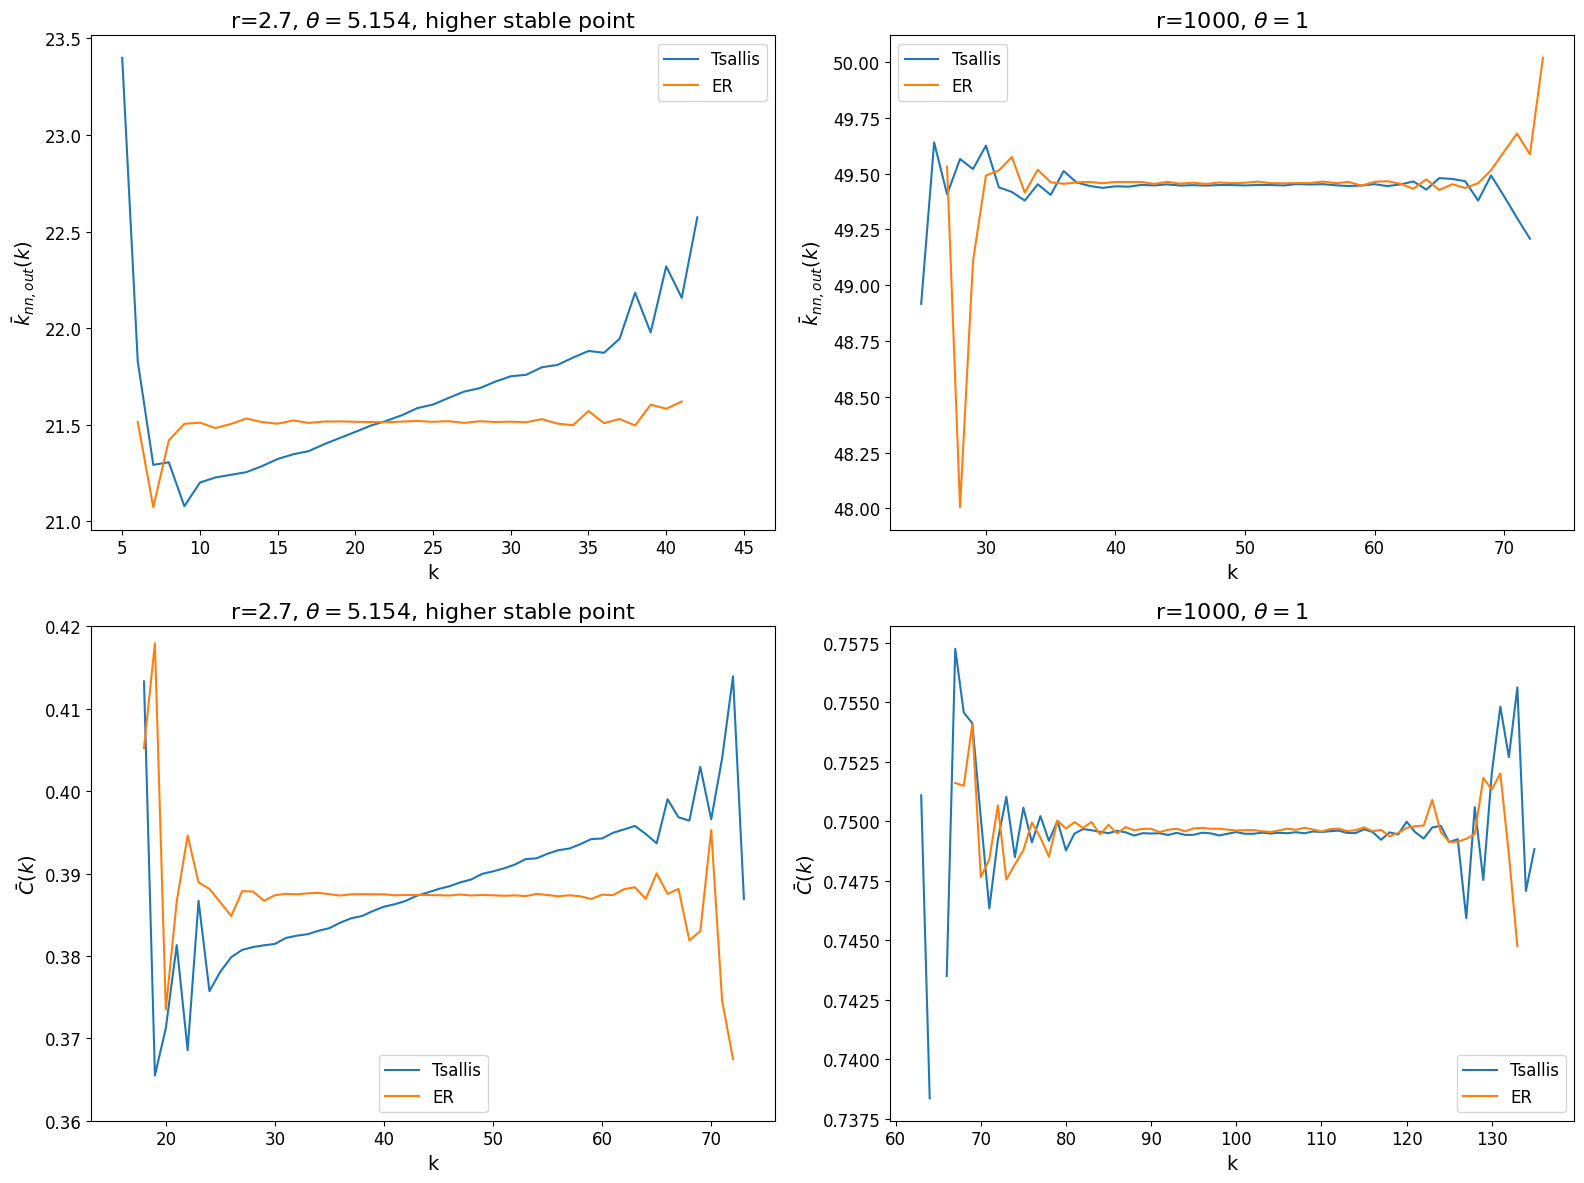

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top left (ANND for r=2.7)
axes[0, 0].plot(range(len(annd_tsallis_high_c_per_degree)), annd_tsallis_high_c_per_degree, label='Tsallis')
axes[0, 0].plot(range(len(annd_er_high_c_per_degree)), annd_er_high_c_per_degree, label='ER')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel(r'$\bar{k}_{nn,out}(k)$')
axes[0, 0].set_title(r'r=2.7, $\theta=5.154$, higher stable point')
axes[0, 0].legend()

# Top right (ANND for r=1000)
axes[0, 1].plot(range(len(annd_tsallis_r_high_per_degree)), annd_tsallis_r_high_per_degree, label='Tsallis')
axes[0, 1].plot(range(len(annd_er_r_high_per_degree)), annd_er_r_high_per_degree, label='ER')
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel(r'$\bar{k}_{nn,out}(k)$')
axes[0, 1].set_title(r'r=1000, $\theta=1$')
axes[0, 1].legend()

# Bottom left (Clustering for r=2.7)
axes[1, 0].plot(range(len(clustering_tsallis_high_c_per_degree)), clustering_tsallis_high_c_per_degree, label='Tsallis')
axes[1, 0].plot(range(len(clustering_er_high_c_per_degree)), clustering_er_high_c_per_degree, label='ER')
axes[1, 0].set_xlabel('k')
axes[1, 0].set_ylabel(r'$\bar{C}(k)$')
axes[1, 0].set_title(r'r=2.7, $\theta=5.154$, higher stable point')
axes[1, 0].set_ylim(0.36, 0.42)
axes[1, 0].legend()

# Bottom right (Clustering for r=1000)
axes[1, 1].plot(range(len(clustering_tsallis_r_high_per_degree)), clustering_tsallis_r_high_per_degree, label='Tsallis')
axes[1, 1].plot(range(len(clustering_er_r_high_per_degree)), clustering_er_r_high_per_degree, label='ER')
axes[1, 1].set_xlabel('k')
axes[1, 1].set_ylabel(r'$\bar{C}(k)$')
axes[1, 1].set_title(r'r=1000, $\theta=1$')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Tsallis-Park-Newman model

In [216]:
from src.ensemble_generators import generate_tsallis_undirected_configuration_ensemble

In [401]:
def fit_tsallis_shift(target_density, r, lagrange_multipliers, num_nodes, num_samples=100, shift_min=-1, shift_max=10, initial_num_edges=100, skip_first_samples=10, max_iterations=30, precision=1e-3, progress_bar=True):
    """
    Find the shift value for Lagrange multipliers that produces a network with the target density.
    
    This function performs a binary search to find the appropriate shift value that,
    when added to the Lagrange multipliers, produces networks with the desired density.
    
    Parameters:
    -----------
    target_density : float
        The desired network density (between 0 and 1)
    r : float
        The r parameter for the Tsallis entropy
    lagrange_multipliers : array-like
        Initial Lagrange multipliers for each node
    num_nodes : int
        Number of nodes in the network
    num_samples : int, optional (default=100)
        Number of network samples to generate for density estimation
    shift_min : float, optional (default=-1)
        Minimum shift value to try
    shift_max : float, optional (default=10)
        Maximum shift value to try
    initial_num_edges : int, optional (default=100)
        Initial number of edges for network generation
    skip_first_samples : int, optional (default=10)
        Number of initial samples to skip (burn-in period)
    max_iterations : int, optional (default=30)
        Maximum number of binary search iterations
    precision : float, optional (default=1e-3)
        Desired precision for the target density
    progress_bar : bool, optional (default=True)
        Whether to display progress bars during network generation
        
    Returns:
    --------
    float, bool
        The optimal shift value and a boolean indicating whether convergence was achieved
    """
    q = 1-r/(num_nodes*(num_nodes-1)/2)
    print(f"r = {r}, q = {q}")
    
    # Get initial densities at the bounds to verify search direction
    shifted_min = lagrange_multipliers + shift_min
    ensemble_min = generate_tsallis_undirected_configuration_ensemble(q, shifted_min, num_nodes, 100, initial_num_edges, progress_bar=progress_bar)
    density_min = np.mean([g.ecount() for g in ensemble_min]) / (num_nodes * (num_nodes - 1) / 2)
    while density_min < target_density:
        shift_min -= 0.3
        print(f"density_min = {density_min:.6f}, target_density = {target_density:.6f}")
        print(f"Out of boundaries, new shift_min = {shift_min:.4f}")
        shifted_min = lagrange_multipliers + shift_min
        ensemble_min = generate_tsallis_undirected_configuration_ensemble(q, shifted_min, num_nodes, 100, initial_num_edges, progress_bar=progress_bar)
        density_min = np.mean([g.ecount() for g in ensemble_min]) / (num_nodes * (num_nodes - 1) / 2)
    
    shifted_max = lagrange_multipliers + shift_max
    ensemble_max = generate_tsallis_undirected_configuration_ensemble(q, shifted_max, num_nodes, 100, initial_num_edges, progress_bar=progress_bar)
    density_max = np.mean([g.ecount() for g in ensemble_max]) / (num_nodes * (num_nodes - 1) / 2)
    while density_max > target_density:
        print(f"density_max = {density_max:.6f}, target_density = {target_density:.6f}")
        print(f"Out of boundaries, new shift_max = {shift_max:.4f}")
        shift_max += 1
        shifted_max = lagrange_multipliers + shift_max
        ensemble_max = generate_tsallis_undirected_configuration_ensemble(q, shifted_max, num_nodes, 100, initial_num_edges, progress_bar=progress_bar)
        density_max = np.mean([g.ecount() for g in ensemble_max]) / (num_nodes * (num_nodes - 1) / 2)
    
    print(f"Initial bounds: shift_min={shift_min} (density={density_min:.6f}), shift_max={shift_max} (density={density_max:.6f})")
    
    # Verify that target is within bounds and determine search direction
    if (density_min > target_density and density_max > target_density) or (density_min < target_density and density_max < target_density):
        print("Warning: Target density may be outside of the search range")
    
    # Determine if larger shift increases or decreases density
    increasing = (density_max > density_min)
    
    for iteration in range(max_iterations):
        shift_current = (shift_min + shift_max) / 2
        
        shifted_multipliers = lagrange_multipliers + shift_current
        test_ensemble = generate_tsallis_undirected_configuration_ensemble(q, shifted_multipliers, num_nodes, num_samples, initial_num_edges, skip_first_samples=skip_first_samples, progress_bar=progress_bar)
        avg_density_current = np.mean([g.ecount() for g in test_ensemble]) / (num_nodes * (num_nodes - 1) / 2)
        
        # Check if we've reached desired precision
        if abs(target_density - avg_density_current) < precision:
            print(f"Converged to shift={shift_current:.4f}, density={avg_density_current:.6f} after {iteration+1} iterations")
            return shift_current, True
        
        # Update search range based on the relationship between shift and density
        if (avg_density_current > target_density and increasing) or (avg_density_current < target_density and not increasing):
            shift_max = shift_current
        else:
            shift_min = shift_current
            
        print(f"Iteration {iteration+1}: shift={shift_current:.4f}, density={avg_density_current:.6f}")
    
    print("Warning: Maximum iterations reached without convergence")
    return shift_current, False

In [212]:
num_nodes = 100
num_samples = 1000
initial_num_edges = 300

In [226]:
np.random.seed(42)
sigma = 2.28
mu = sigma**2/2
thetas = np.random.normal(mu, sigma, size=num_nodes)

In [457]:
def compute_annd_clustering_target_density(target_density, r_values, thetas, num_nodes, num_samples, num_samples_shift=400, precision=1e-3):
    ensembles = {}
    for r in r_values:
        shift, converged = fit_tsallis_shift(target_density, r, thetas, num_nodes, num_samples_shift, shift_min=0, shift_max=1, initial_num_edges=10, precision=precision, progress_bar=False)
        if converged:
            q = 1-r/(num_nodes*(num_nodes-1)/2)
            ensembles[r] = generate_tsallis_undirected_configuration_ensemble(q, thetas + shift, num_nodes, num_samples, 10)
    annd_per_degree_dict = {}
    clustering_per_degree_dict = {}
    for r in ensembles.keys():
        annd_per_degree = compute_annd_per_degree(ensembles[r])
        clustering_per_degree = compute_clustering_per_degree(ensembles[r])
        annd_per_degree_dict[r] = annd_per_degree
        clustering_per_degree_dict[r] = clustering_per_degree
    return ensembles, annd_per_degree_dict, clustering_per_degree_dict


#### c = 0.1

In [410]:
ensembles_01, annd_per_degree_dict_01, clustering_per_degree_dict_01 = compute_annd_clustering_target_density(0.1, [0,1,2,3,4,5], thetas, num_nodes, num_samples)

r = 0, q = 1.0
density_min = 0.085842, target_density = 0.100000
Out of boundaries, new shift_min = -0.3000
Initial bounds: shift_min=-0.3 (density=0.114782), shift_max=1 (density=0.026758)
Iteration 1: shift=0.3500, density=0.058448
Iteration 2: shift=0.0250, density=0.082907
Iteration 3: shift=-0.1375, density=0.098072
Iteration 4: shift=-0.2188, density=0.105793
Iteration 5: shift=-0.1781, density=0.101912
Converged to shift=-0.1578, density=0.099922 after 6 iterations


100%|██████████| 1000/1000 [01:28<00:00, 11.34it/s]


r = 1, q = 0.9997979797979798
density_min = 0.085665, target_density = 0.100000
Out of boundaries, new shift_min = -0.3000
Initial bounds: shift_min=-0.3 (density=0.113053), shift_max=1 (density=0.027539)
Iteration 1: shift=0.3500, density=0.059841
Iteration 2: shift=0.0250, density=0.083836
Iteration 3: shift=-0.1375, density=0.097902
Iteration 4: shift=-0.2188, density=0.105287
Iteration 5: shift=-0.1781, density=0.101578
Converged to shift=-0.1578, density=0.100061 after 6 iterations


100%|██████████| 1000/1000 [01:20<00:00, 12.36it/s]


r = 2, q = 0.9995959595959596
density_min = 0.087337, target_density = 0.100000
Out of boundaries, new shift_min = -0.3000
Initial bounds: shift_min=-0.3 (density=0.111745), shift_max=1 (density=0.029327)
Iteration 1: shift=0.3500, density=0.062167
Iteration 2: shift=0.0250, density=0.085123
Iteration 3: shift=-0.1375, density=0.097830
Iteration 4: shift=-0.2188, density=0.104380
Iteration 5: shift=-0.1781, density=0.101655
Converged to shift=-0.1578, density=0.099237 after 6 iterations


100%|██████████| 1000/1000 [01:20<00:00, 12.47it/s]


r = 3, q = 0.9993939393939394
density_min = 0.088016, target_density = 0.100000
Out of boundaries, new shift_min = -0.3000
Initial bounds: shift_min=-0.3 (density=0.107602), shift_max=1 (density=0.031135)
Iteration 1: shift=0.3500, density=0.066127
Iteration 2: shift=0.0250, density=0.087215
Iteration 3: shift=-0.1375, density=0.098492
Iteration 4: shift=-0.2188, density=0.102620
Converged to shift=-0.1781, density=0.100176 after 5 iterations


100%|██████████| 1000/1000 [01:20<00:00, 12.44it/s]


r = 4, q = 0.9991919191919192
Initial bounds: shift_min=0 (density=0.168418), shift_max=1 (density=0.034703)
Iteration 1: shift=0.5000, density=0.301075
Iteration 2: shift=0.7500, density=0.051155
Iteration 3: shift=0.6250, density=0.184354
Iteration 4: shift=0.6875, density=0.187990
Iteration 5: shift=0.7188, density=0.054953
Iteration 6: shift=0.7031, density=0.301367
Iteration 7: shift=0.7109, density=0.053703
Iteration 8: shift=0.7070, density=0.103349
Iteration 9: shift=0.7090, density=0.055169
Iteration 10: shift=0.7080, density=0.245035
Iteration 11: shift=0.7085, density=0.053825
Iteration 12: shift=0.7083, density=0.053537
Iteration 13: shift=0.7081, density=0.054206
Iteration 14: shift=0.7081, density=0.054349
Iteration 15: shift=0.7080, density=0.054818
Iteration 16: shift=0.7080, density=0.054381
Iteration 17: shift=0.7080, density=0.054471
Iteration 18: shift=0.7080, density=0.053554
Iteration 19: shift=0.7080, density=0.056533
Iteration 20: shift=0.7080, density=0.238280


  0%|          | 0/1000 [00:00<?, ?it/s]/Volumes/D/FJFI/Diploma_thesis/code_official/Tsallis-Network-Models/src/network_properties.py:12: RuntimeWarning: Mean of empty slice
  annd_array[i] = np.nanmean([neighbor.degree(mode=mode, loops=False) for neighbor in neighbors if neighbor != vertex])
100%|██████████| 1000/1000 [00:00<00:00, 22493.18it/s]


In [465]:
for r in ensembles_01.keys():
    print(f"Average number of links in the ensemble for r={r}: {np.mean([g.ecount() for g in ensembles_01[r]]) / (num_nodes * (num_nodes - 1) / 2):.4f}")


Average number of links in the ensemble for r=0: 0.1000
Average number of links in the ensemble for r=1: 0.0997
Average number of links in the ensemble for r=2: 0.0996
Average number of links in the ensemble for r=3: 0.1001


#### c=0.05

In [458]:
ensembles_005, annd_per_degree_dict_005, clustering_per_degree_dict_005 = compute_annd_clustering_target_density(0.05, [0,1,2,3,4,5], thetas, num_nodes, num_samples, num_samples_shift=500, precision=1e-4)


r = 0, q = 1.0
Initial bounds: shift_min=0 (density=0.085048), shift_max=1 (density=0.026776)
Iteration 1: shift=0.5000, density=0.049331
Iteration 2: shift=0.2500, density=0.065239
Iteration 3: shift=0.3750, density=0.056859
Iteration 4: shift=0.4375, density=0.053178
Iteration 5: shift=0.4688, density=0.050994
Iteration 6: shift=0.4844, density=0.050331
Iteration 7: shift=0.4922, density=0.049776
Converged to shift=0.4883, density=0.049930 after 8 iterations


100%|██████████| 1000/1000 [01:31<00:00, 10.93it/s]


r = 1, q = 0.9997979797979798
Initial bounds: shift_min=0 (density=0.085747), shift_max=1 (density=0.027996)
Iteration 1: shift=0.5000, density=0.050926
Iteration 2: shift=0.7500, density=0.037915
Iteration 3: shift=0.6250, density=0.044021
Iteration 4: shift=0.5625, density=0.047302
Iteration 5: shift=0.5312, density=0.049064
Converged to shift=0.5156, density=0.049912 after 6 iterations


100%|██████████| 1000/1000 [01:24<00:00, 11.87it/s]


r = 2, q = 0.9995959595959596
Initial bounds: shift_min=0 (density=0.086358), shift_max=1 (density=0.029400)
Iteration 1: shift=0.5000, density=0.052804
Iteration 2: shift=0.7500, density=0.039778
Iteration 3: shift=0.6250, density=0.045912
Iteration 4: shift=0.5625, density=0.049210
Iteration 5: shift=0.5312, density=0.051250
Iteration 6: shift=0.5469, density=0.050162
Iteration 7: shift=0.5547, density=0.049739
Iteration 8: shift=0.5508, density=0.049781
Converged to shift=0.5488, density=0.050069 after 9 iterations


100%|██████████| 1000/1000 [01:24<00:00, 11.81it/s]


r = 3, q = 0.9993939393939394
Initial bounds: shift_min=0 (density=0.089208), shift_max=1 (density=0.031044)
Iteration 1: shift=0.5000, density=0.056595
Iteration 2: shift=0.7500, density=0.042913
Iteration 3: shift=0.6250, density=0.049355
Iteration 4: shift=0.5625, density=0.053328
Iteration 5: shift=0.5938, density=0.051162
Iteration 6: shift=0.6094, density=0.050772
Iteration 7: shift=0.6172, density=0.049590
Converged to shift=0.6133, density=0.050037 after 8 iterations


100%|██████████| 1000/1000 [01:20<00:00, 12.37it/s]


r = 4, q = 0.9991919191919192
Initial bounds: shift_min=0 (density=0.095242), shift_max=1 (density=0.035362)
Iteration 1: shift=0.5000, density=0.314762
Iteration 2: shift=0.7500, density=0.050878
Iteration 3: shift=0.8750, density=0.042481
Iteration 4: shift=0.8125, density=0.046806
Iteration 5: shift=0.7812, density=0.048793
Iteration 6: shift=0.7656, density=0.050876
Iteration 7: shift=0.7734, density=0.048848
Iteration 8: shift=0.7695, density=0.048968
Iteration 9: shift=0.7676, density=0.049096
Iteration 10: shift=0.7666, density=0.050318
Iteration 11: shift=0.7671, density=0.049542
Iteration 12: shift=0.7668, density=0.049428
Converged to shift=0.7667, density=0.049926 after 13 iterations


100%|██████████| 1000/1000 [01:20<00:00, 12.42it/s]


r = 5, q = 0.998989898989899
density_max = 0.345743, target_density = 0.050000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.357749), shift_max=2 (density=0.008097)
Iteration 1: shift=1.0000, density=0.370423
Iteration 2: shift=1.5000, density=0.018655
Iteration 3: shift=1.2500, density=0.287073
Iteration 4: shift=1.3750, density=0.023110
Iteration 5: shift=1.3125, density=0.026549
Iteration 6: shift=1.2812, density=0.305401
Iteration 7: shift=1.2969, density=0.027189
Iteration 8: shift=1.2891, density=0.027964
Iteration 9: shift=1.2852, density=0.230061
Iteration 10: shift=1.2871, density=0.120210
Iteration 11: shift=1.2881, density=0.157728
Iteration 12: shift=1.2886, density=0.335977
Iteration 13: shift=1.2888, density=0.027444
Iteration 14: shift=1.2887, density=0.035169
Iteration 15: shift=1.2886, density=0.027099
Iteration 16: shift=1.2886, density=0.028204
Iteration 17: shift=1.2886, density=0.027463
Iteration 18: shift=1.2886, density=0.028028

  0%|          | 0/1000 [00:00<?, ?it/s]/Volumes/D/FJFI/Diploma_thesis/code_official/Tsallis-Network-Models/src/network_properties.py:12: RuntimeWarning: Mean of empty slice
  annd_array[i] = np.nanmean([neighbor.degree(mode=mode, loops=False) for neighbor in neighbors if neighbor != vertex])
100%|██████████| 1000/1000 [00:00<00:00, 29834.65it/s]


In [462]:
for r in ensembles_005.keys():
    print(f"Average number of links in the ensemble for r={r}: {np.mean([g.ecount() for g in ensembles_005[r]]) / (num_nodes * (num_nodes - 1) / 2):.4f}")


Average number of links in the ensemble for r=0: 0.0501
Average number of links in the ensemble for r=1: 0.0499
Average number of links in the ensemble for r=2: 0.0501
Average number of links in the ensemble for r=3: 0.0499
Average number of links in the ensemble for r=4: 0.0513


In [459]:
ensembles_001, annd_per_degree_dict_001, clustering_per_degree_dict_001 = compute_annd_clustering_target_density(0.01, [0,1,3,5,7,9], thetas, num_nodes, num_samples, precision=1e-4)

r = 0, q = 1.0
density_max = 0.026869, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.085093), shift_max=2 (density=0.006648)
Iteration 1: shift=1.0000, density=0.026772
Iteration 2: shift=1.5000, density=0.013739
Iteration 3: shift=1.7500, density=0.009686
Iteration 4: shift=1.6250, density=0.011423
Iteration 5: shift=1.6875, density=0.010483
Iteration 6: shift=1.7188, density=0.009839
Iteration 7: shift=1.7031, density=0.010355
Iteration 8: shift=1.7109, density=0.010233
Converged to shift=1.7148, density=0.010092 after 9 iterations


100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]


r = 1, q = 0.9997979797979798
density_max = 0.027362, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.085679), shift_max=2 (density=0.006719)
Iteration 1: shift=1.0000, density=0.027822
Iteration 2: shift=1.5000, density=0.014179
Iteration 3: shift=1.7500, density=0.009886
Iteration 4: shift=1.6250, density=0.011952
Iteration 5: shift=1.6875, density=0.010822
Iteration 6: shift=1.7188, density=0.010381
Iteration 7: shift=1.7344, density=0.010189
Converged to shift=1.7422, density=0.010022 after 8 iterations


100%|██████████| 1000/1000 [01:18<00:00, 12.69it/s]


r = 3, q = 0.9993939393939394
density_max = 0.031378, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.088436), shift_max=2 (density=0.007079)
Iteration 1: shift=1.0000, density=0.031440
Iteration 2: shift=1.5000, density=0.015656
Iteration 3: shift=1.7500, density=0.010812
Iteration 4: shift=1.8750, density=0.008759
Iteration 5: shift=1.8125, density=0.009726
Iteration 6: shift=1.7812, density=0.010213
Iteration 7: shift=1.7969, density=0.009896
Iteration 8: shift=1.7891, density=0.010183
Converged to shift=1.7930, density=0.009987 after 9 iterations


100%|██████████| 1000/1000 [01:19<00:00, 12.64it/s]


r = 5, q = 0.998989898989899
density_max = 0.350321, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.355907), shift_max=2 (density=0.008012)
Iteration 1: shift=1.0000, density=0.372405
Iteration 2: shift=1.5000, density=0.018722
Iteration 3: shift=1.7500, density=0.012145
Iteration 4: shift=1.8750, density=0.009839
Iteration 5: shift=1.8125, density=0.010723
Iteration 6: shift=1.8438, density=0.010412
Iteration 7: shift=1.8594, density=0.010151
Iteration 8: shift=1.8672, density=0.009865
Converged to shift=1.8633, density=0.010024 after 9 iterations


100%|██████████| 1000/1000 [01:21<00:00, 12.28it/s]


r = 7, q = 0.9985858585858586
density_max = 0.410109, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
Initial bounds: shift_min=0 (density=0.409430), shift_max=2 (density=0.009109)
Iteration 1: shift=1.0000, density=0.416339
Iteration 2: shift=1.5000, density=0.416432
Iteration 3: shift=1.7500, density=0.381862
Iteration 4: shift=1.8750, density=0.136390
Iteration 5: shift=1.9375, density=0.010748
Iteration 6: shift=1.9688, density=0.009882
Iteration 7: shift=1.9531, density=0.009896
Iteration 8: shift=1.9453, density=0.010643
Iteration 9: shift=1.9492, density=0.010453
Iteration 10: shift=1.9512, density=0.010224
Iteration 11: shift=1.9521, density=0.010604
Iteration 12: shift=1.9526, density=0.010230
Iteration 13: shift=1.9529, density=0.010227
Iteration 14: shift=1.9530, density=0.010464
Iteration 15: shift=1.9531, density=0.010310
Iteration 16: shift=1.9531, density=0.010611
Iteration 17: shift=1.9531, density=0.010572
Iteration 18: shift=1.9531, density=0.01018

100%|██████████| 1000/1000 [01:19<00:00, 12.52it/s]


r = 9, q = 0.9981818181818182
density_max = 0.433489, target_density = 0.010000
Out of boundaries, new shift_max = 1.0000
density_max = 0.400931, target_density = 0.010000
Out of boundaries, new shift_max = 2.0000
Initial bounds: shift_min=0 (density=0.434368), shift_max=3 (density=0.001455)
Iteration 1: shift=1.5000, density=0.438051
Iteration 2: shift=2.2500, density=0.007020
Iteration 3: shift=1.8750, density=0.437821
Iteration 4: shift=2.0625, density=0.438055
Iteration 5: shift=2.1562, density=0.396216
Iteration 6: shift=2.2031, density=0.007927
Iteration 7: shift=2.1797, density=0.255417
Iteration 8: shift=2.1914, density=0.419635
Iteration 9: shift=2.1973, density=0.322529
Iteration 10: shift=2.2002, density=0.427491
Iteration 11: shift=2.2017, density=0.300820
Iteration 12: shift=2.2024, density=0.007845
Iteration 13: shift=2.2020, density=0.231490
Iteration 14: shift=2.2022, density=0.079300
Iteration 15: shift=2.2023, density=0.007672
Iteration 16: shift=2.2023, density=0.136

100%|██████████| 1000/1000 [00:00<00:00, 39112.84it/s]


In [467]:
for r in ensembles_001.keys():
    print(f"Average number of links in the ensemble for r={r}: {np.mean([g.ecount() for g in ensembles_001[r]]) / (num_nodes * (num_nodes - 1) / 2):.5f}")


Average number of links in the ensemble for r=0: 0.01009
Average number of links in the ensemble for r=1: 0.01004
Average number of links in the ensemble for r=3: 0.00995
Average number of links in the ensemble for r=5: 0.00995
Average number of links in the ensemble for r=7: 0.01016


In [468]:
def plot_degree_distributions(ensembles, loglog=False):
    for r in ensembles.keys():
        degrees = []
        for g in ensembles[r]:
            degrees.extend(g.degree())
        # Calculate degree distribution
        unique_degrees, counts = np.unique(degrees, return_counts=True)
        probabilities = counts / len(degrees)
        
        # Plot degree distribution as a line plot
        plt.plot(unique_degrees, probabilities, marker='o', linestyle='-', label=f'r={r}')
        
        # Add labels and legend

        plt.xlabel('Degree')
        plt.ylabel('Probability')
        if loglog:
            plt.xscale('log')
            plt.yscale('log')
        plt.legend()
    return plt

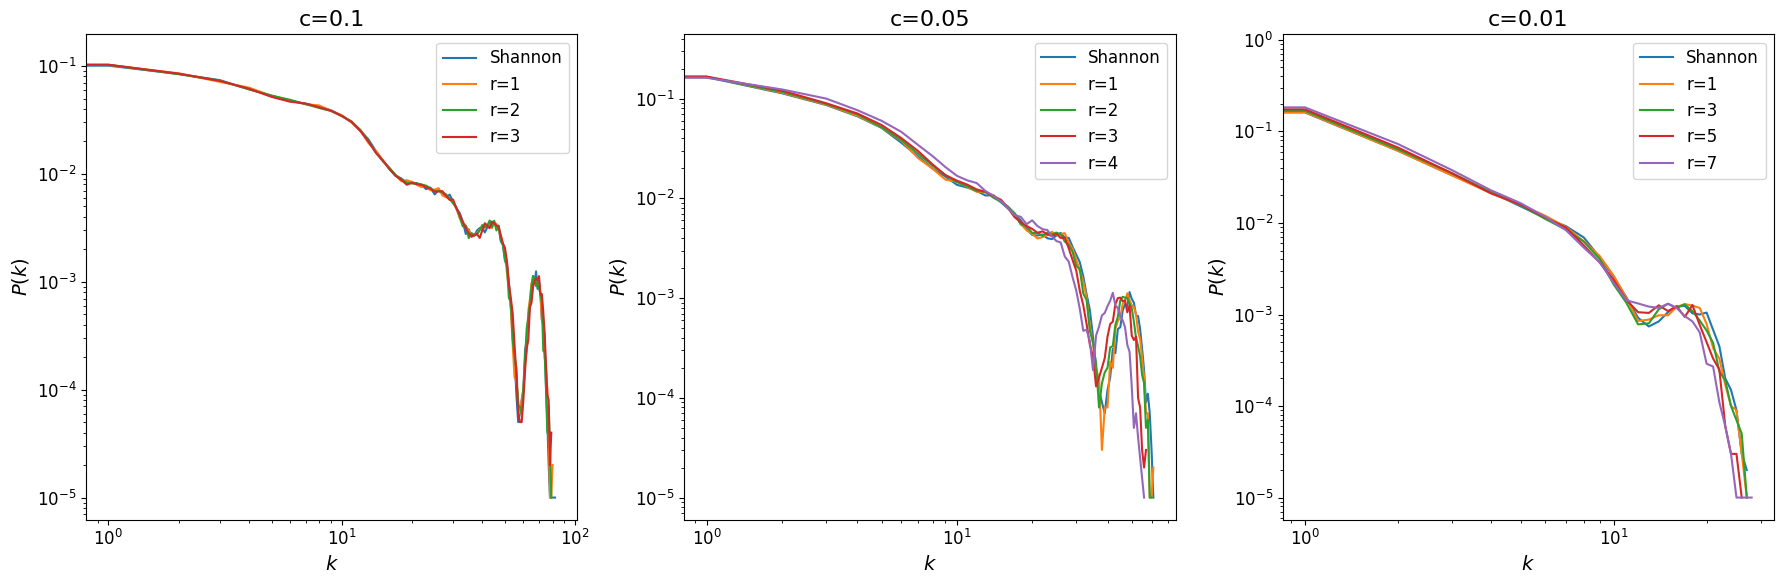

In [469]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot degree distributions for each ensemble in its own subplot
for i, (ensemble, title) in enumerate(zip([ensembles_01, ensembles_005, ensembles_001], 
                                         ['c=0.1', 'c=0.05', 'c=0.01'])):
    # Set the current subplot
    plt.sca(axes[i])
    
    # Plot degree distribution for this ensemble
    for r in ensemble.keys():
        degrees = []
        for g in ensemble[r]:
            degrees.extend(g.degree())
        # Calculate degree distribution
        unique_degrees, counts = np.unique(degrees, return_counts=True)
        probabilities = counts / len(degrees)
        
        # Plot degree distribution as a line plot
        plt.plot(unique_degrees, probabilities, label=f'r={r}' if r != 0 else 'Shannon')
    
    # Add labels and title
    plt.xlabel('$k$', fontsize=14)
    plt.ylabel('$P(k)$', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12)
    
    # Set log-log scale
    plt.xscale('log')
    plt.yscale('log')

plt.tight_layout()
plt.show()


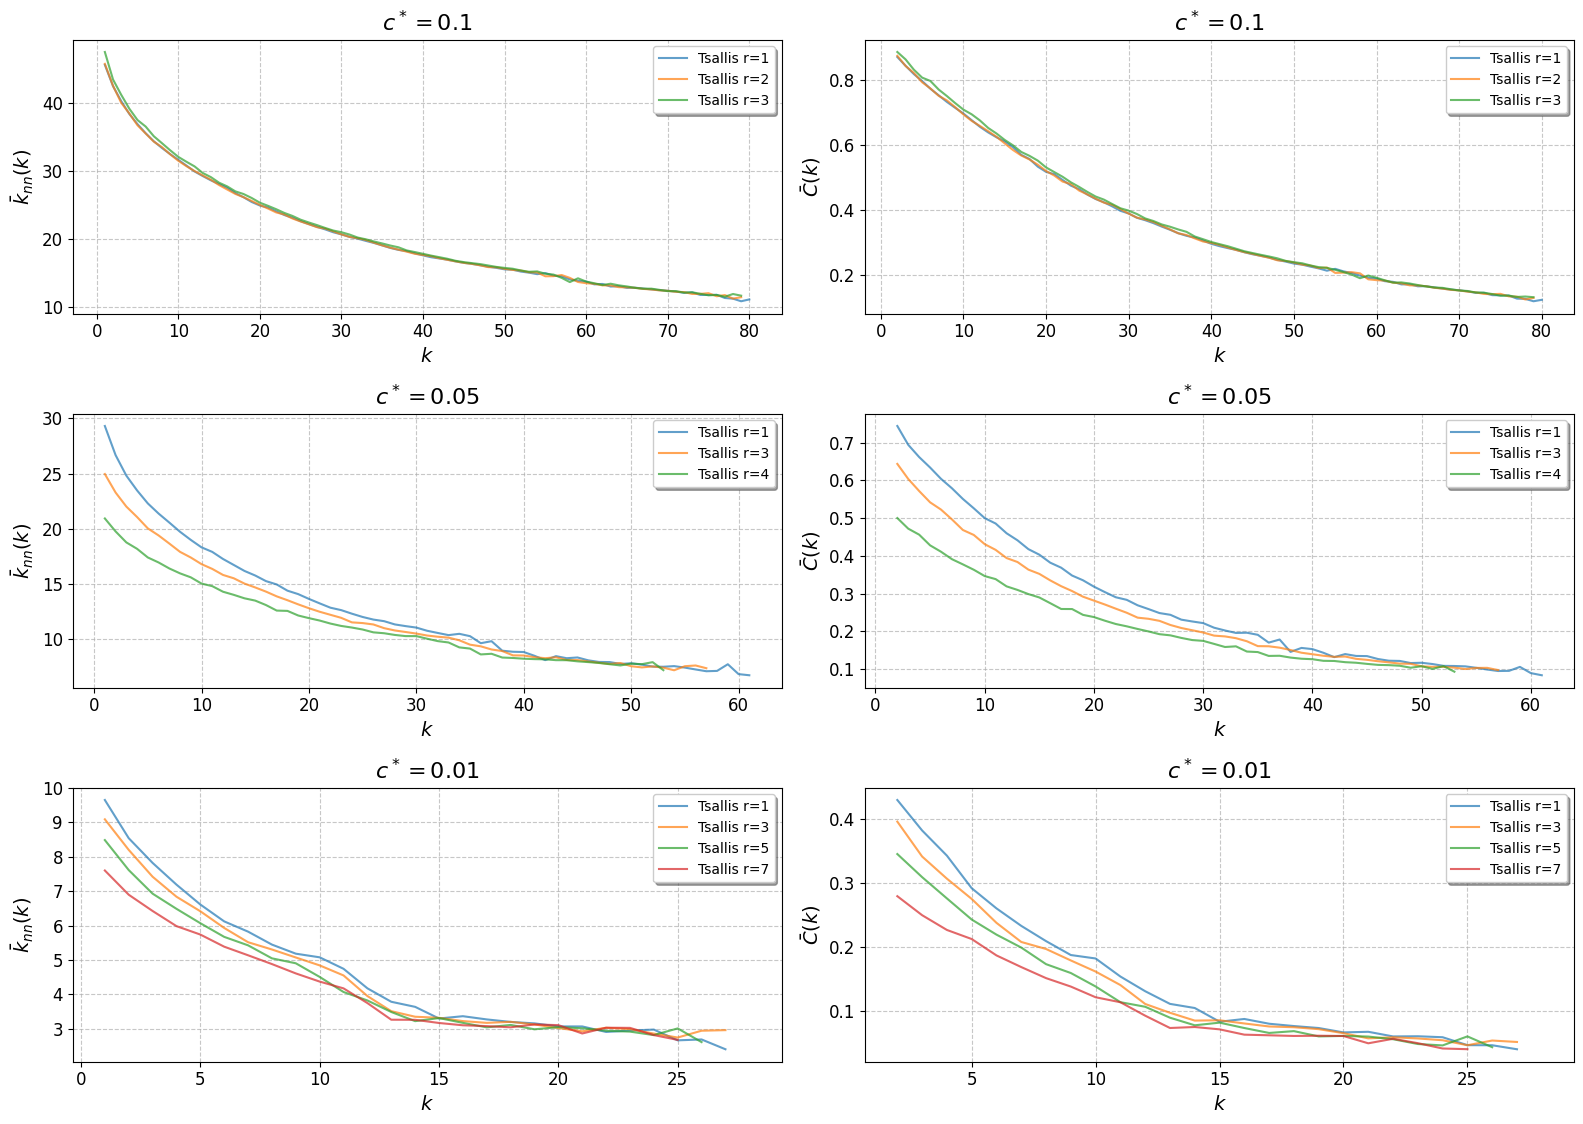

In [463]:
# Create a 3x2 figure for plotting ANND and clustering coefficient for different densities
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

# Densities to plot
densities = ['01', '005', '001']
density_labels = ['$c^* = 0.1$', '$c^* = 0.05$', '$c^* = 0.01$']
r_to_plot = {'01': [1,2,3,], '005': [1,3,4], '001': [1,3,5,7]}

for i, (density, density_label) in enumerate(zip(densities, density_labels)):
    # Get the appropriate variables based on density
    if density == '01':
        annd_per_degree_tsallis_to_plot = annd_per_degree_dict_01
        clustering_per_degree_tsallis_to_plot = clustering_per_degree_dict_01
    elif density == '005':
        annd_per_degree_tsallis_to_plot = annd_per_degree_dict_005
        clustering_per_degree_tsallis_to_plot = clustering_per_degree_dict_005
    elif density == '001':
        annd_per_degree_tsallis_to_plot = annd_per_degree_dict_001
        clustering_per_degree_tsallis_to_plot = clustering_per_degree_dict_001
    
    # Left column: ANND per degree
    for r in r_to_plot[density]:
        degrees = range(len(annd_per_degree_tsallis_to_plot[r]))
        axs[i, 0].plot(degrees, annd_per_degree_tsallis_to_plot[r], label=f'Tsallis r={r}' if r != 0 else 'Shannon', alpha=0.7)

    
    axs[i, 0].set_xlabel('$k$', fontsize=14)
    axs[i, 0].set_ylabel(r'$\bar{k}_{nn}(k)$', fontsize=14)
    axs[i, 0].set_title(density_label, fontsize=16)
    axs[i, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Right column: Clustering coefficient per degree
    for r in r_to_plot[density]:
        degrees = range(len(clustering_per_degree_tsallis_to_plot[r]))
        axs[i, 1].plot(degrees, clustering_per_degree_tsallis_to_plot[r], label=f'Tsallis r={r}' if r != 0 else 'Shannon', alpha=0.7)
    
    
    axs[i, 1].set_xlabel('$k$', fontsize=14)
    axs[i, 1].set_ylabel(r'$\bar{C}(k)$', fontsize=14)
    axs[i, 1].set_title(density_label, fontsize=16)
    axs[i, 1].grid(True, linestyle='--', alpha=0.7)

# Add legends to each subplot individually
for i in range(len(densities)):
    for j in range(2):
        # Place the legend outside the plot area to avoid overlapping with data
        axs[i, j].legend(loc='upper right', fontsize=10, frameon=True, 
                         fancybox=True, shadow=True)


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the legend
plt.show()
